<div class="alert alert-info">
Привет, Евгений! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

# Выпускной проект: Анализ оттока клиентов из Метанпромбанка.

***Материалы: https://disk.yandex.ru/i/aj30t_Kb4v_4RA***

**Задача проекта**

*Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.*

 - Проведите исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)
 - Сформулируйте и проверьте статистические гипотезы. 
   - Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. 
   - Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование.
 - Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации.
 
*По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf, прикрепив ссылку на файл в основном проекте.*

(задачи выше сформулированы предварительно, окончательная постановка
задачи произойдёт на вводной встрече)

**Описание данных**

`/datasets/bank_scrooge.csv`

***Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.***

 - `USERID` — идентификатор пользователя,
 - `score` — баллы кредитного скоринга,
 - `city` — город,
 - `gender` — пол,
 - `age` — возраст,
 - `equity` — количество баллов собственности
 - `balance` — баланс на счёте,
 - `products` — количество продуктов, которыми пользуется клиент,
 - `credit_card` — есть ли кредитная карта,
 - `last_activity` — активный клиент,
 - `EST_SALARY` — оценочный доход клиента,
 - `сhurn` — признак оттока.


**Декомпозиция проекта**

***Шаг 1. Загрузка данных и изучение общей информации***

***Шаг 2. Подготовка данных***

- 2.1 Приведение названия столбцов к нижнему и "змеинному" регистру
- 2.2 Проверка наличия дубликатов
- 2.3 Проверка на наличие пропусков в данных
- 2.4 Проверка значений на наличие выбросов и аномалий
- 2.5 Преобразование данных к нужному типу

***Шаг 3. Исследовательский анализ данных***

- 3.1 Какой общий процент оттока клиентов у банка
- 3.2 Какой процент оттока клиентов в разных городах
- 3.3 Общий портрет клиентов в разных городах по средним значениям
- 3.4 Выяснить влияет ли наличие кредитной карты, активности клиентов или пол на отток клиентов

***Шаг 4. Выделение категорий ушедших клиентов***

- 4.1 Сегментирование клиентов по признакам
- 4.2 Составление портретов  клиентов по нескольким сегментам
- 4.3 Выделение трех групп клиентов из выделенных сегментов, которые чаще всего уходят

***Шаг 5. Проверка гипотез***

- 5.1 Формулирование и проверка гипотезы №1
- 5.2 Формулирование и проверка гипотезы №2
- 5.3 Формулирование и проверка гипотезы №3

***Шаг 6. Общий вывод и рекомендации***

***Шаг 7. Презентация***

### Загрузка данных и изучение общей информации

In [1]:
# импортируем необходимые для работы библиотеки:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import plotly.express as px
from math import sqrt
from scipy import stats as st
from scipy.stats import norm
from scipy.stats import spearmanr
from plotly import graph_objects as go

In [2]:
# напишем функцию для изучения общей информации имеющегося датасета

def data_analys(df):
    display (df.head(10))
    print('*'*80),
    df.info()
    print('*'*80),
    print(f'Количество пропущенных значений во всех столбцах датафрейма:\n{df.isna().sum()}')
    print('*'*80),
    print(f'Процент пропущенных значений во всех столбцах датафрейма:\n{pd.DataFrame(round(data.isna().mean()*100,1))}')
    print('*'*80),
    print(f'Количество явных дубликатов:{df.duplicated().sum()}')

In [3]:
# загрузим имеющейся датафрейм

pth1 = '/datasets/bank_scrooge.csv'
pth2 = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
# посмотрим общую информацию

data_analys(data)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
********************************************************************************
Количество пропущенных значений во всех столбцах д

In [5]:
# посмотрим информацию по числовым значениям

data.describe().round(1)

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.0,10000.0,9974.0,10000.0,7705.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,171814.7,848.7,42.7,2.6,827794.3,1.9,0.7,0.5,147866.9,0.2
std,33708.2,65.4,12.2,2.0,1980614.1,0.8,0.5,0.5,139388.5,0.4
min,94561.0,642.0,18.0,0.0,0.0,0.0,0.0,0.0,2546.3,0.0
25%,142810.2,802.0,33.0,0.0,295554.2,1.0,0.0,0.0,75251.9,0.0
50%,172728.0,853.0,40.0,3.0,524272.2,2.0,1.0,1.0,119658.1,0.0
75%,201261.8,900.0,51.0,4.0,980705.8,2.0,1.0,1.0,174500.5,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.4,1.0


***После просмотра общих данных можно увидеть, что мы имеем информацию о 10 тыс. клиентов разного возраста, с разными доходами, активных и не активных, а так же ушедших из банка на данный момент. В данных имеются пропуски, название столбцов нужно привести к нижнему и "Змеинному" регистру,изменить тип данных в некоторых из них, а так же посмотреть аномалии и наличие выбросов.***

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и просмотрен
</div>

### Подготовка данных

#### Приведение названия столбцов к нижнему и "змеинному" регистру

In [6]:
# приведем названия столбцов к нижнему и "змеиному" регистрам:

data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})

# проверим, что столбцы переименовались

display (data.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Проверка наличия дубликатов

In [7]:
# проверим наличие дубликатов по идентификатору пользователей

data['user_id'].duplicated().sum()

73

In [8]:
# в таблице 73 дубликата по идентификатору пользователей, но у нас три города, посмотрим дубликаты в паре `user_id` и `city`


data[data.duplicated(['user_id', 'city'])]

# дубликатов не обнаружено 

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Проверка на наличие пропусков в данных

In [9]:
# в столбце возраст 0,3% пропусков, удалим их из таблицы 

data = data.dropna(subset=['age'])

In [10]:
# посмотрим какое количество клиентов с нулевым балансом

data[data['balance'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


In [11]:
# у нас всего два клиента с нулевым балансов, заменим пропуски в балансе на нули 

data['balance'] = data['balance'].fillna(0)

In [12]:
# проверим все изменения

data.isna().sum()

user_id          0
score            0
city             0
gender           0
age              0
equity           0
balance          0
products         0
credit_card      0
last_activity    0
est_salary       0
churn            0
dtype: int64

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Проверка значений на наличие выбросов и аномалий

In [13]:
# при изучении общей информации было видно, что есть клиенты с нулевым количеством продуктов
# посмотрим сколько таких клиентов 

data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,0.0,0,0,0,25063.96,1


In [14]:
# один клиент без баланса на счете, не активный и ушедший, удалим его из таблицы 

data = data[data['products'] > 0]

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

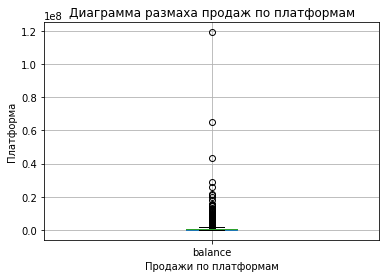

In [15]:
# так же при изучении общей информации в одном только столбце `balance` показатели mean сильно отличались от 50%

# построим диаграмму размаха

data.boxplot('balance')
plt.xlabel('Продажи по платформам')
plt.ylabel('Платформа')
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

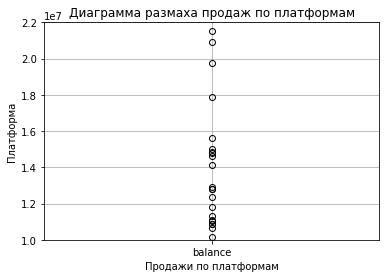

In [16]:
# видим, что есть аномалии

data.boxplot('balance')
plt.xlabel('Продажи по платформам')
plt.ylabel('Платформа')
plt.title('Диаграмма размаха продаж по платформам')
plt.ylim(10000000,22000000)
plt.show()

In [17]:
# посмотрим сколько таких счетов и какие на них суммы

data['balance'].sort_values(ascending=False).head(10).round(1)

7597    119113552.0
1059     64866210.2
1846     43277099.8
4721     29008931.9
9753     25727761.9
8484     21549943.6
6948     20906155.5
125      19757180.8
7109     17904763.0
4005     15624095.8
Name: balance, dtype: float64

In [18]:
data['balance'].sum()

6365654795.93

In [19]:
# посмотрим какой процент от суммы всех счетов они имеют

data.query('balance > 16000000')['balance'].sum() / data['balance'].sum() * 100

# всего чуть больше 5% от общей суммы на счетах в банке, оставим эти данные в таблице

5.688520826192504

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Преобразование данных к нужному типу

In [20]:
# приведем столбцы `score` и `age` к целочисленным значениям

data = data.astype({'score': int, 'age': int}, errors='ignore')

In [21]:
# переведем обозначение пола клиента в численные значения (женский пол = 0, мужской пол = 1)

data['gender'] = data['gender'].replace({'Ж': 0, 'М': 1})

In [22]:
# проверим изменения

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   int64  
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        9973 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 1012.9+ KB


***Данные подготовлены к дальнейшему анализу. Столбцы приведены к нужному типу и для удобства к правильному виду, данные проверены на дубликаты, аномалии и выбросы. Пропуски и аномалии удалены, либо заменены.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Исследовательский анализ данных

#### Какой общий процент оттока клиентов у банка

In [23]:
# посмотрим какой общий процент оттока у банка

print('Общий процент оттока у банка:', data['churn'].mean().round(3) * 100)

Общий процент оттока у банка: 18.2


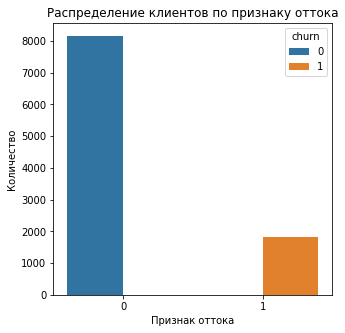

In [24]:
# построим диаграмму распределение клиентов по признаку оттока

plt.figure(figsize=(5,5))
sns.countplot(x='churn', data=data, hue='churn')
plt.title('Распределение клиентов по признаку оттока')
plt.xlabel('Признак оттока')
plt.ylabel('Количество')
plt.show()

*Общий отток у банка 18,2%, это довольно большое количество клиентов, в следующем шаге посмотрим каждый город отдельно.
Для нагладности была построена диаграмма.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Какой процент оттока клиентов в разных городах

In [25]:
# посмотрим какой процент оттока у банков в разных городах

print('Процент оттока у банка в г. Ярославль:', data.query('city == "Ярославль"')['churn'].mean().round(3) * 100)
print('Процент оттока у банка в г. Ростов:', data.query('city == "Ростов"')['churn'].mean().round(3) * 100)
print('Процент оттока у банка в г. Рыбинск:', data.query('city == "Рыбинск"')['churn'].mean().round(3) * 100)

Процент оттока у банка в г. Ярославль: 19.0
Процент оттока у банка в г. Ростов: 18.7
Процент оттока у банка в г. Рыбинск: 16.3


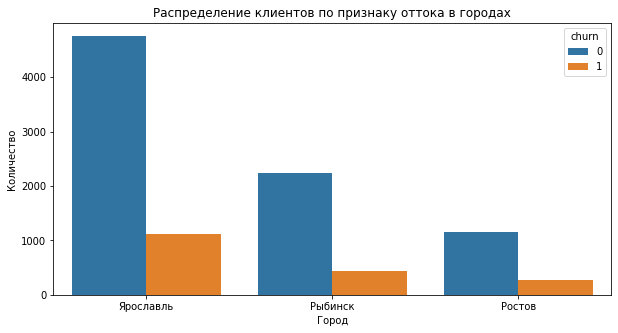

In [26]:
# построим диаграмму распределения количества клиентов по признаку оттока в городах

plt.figure(figsize=(10,5))
sns.countplot(x='city', data=data.sort_values(by='city', ascending=False), hue='churn')
plt.title('Распределение клиентов по признаку оттока в городах')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.show()

*Самый большой отток клиентов в г. Ярославль - 19%, далее г. Ростов - 18.7% и самый маленький процент оттока в г. Рыбинск - 16.3%.*

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Общий портрет клиентов в разных городах по средним значениям

In [27]:
# с помощью среза посмотрим средние числовые значения в каждом городе и составим портреты

data.query('city == "Ярославль"').describe().round(1)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,5875.0,5875.0,5875.0,5875.0,5875.0,5875.0,5875.0,5875.0,5875.0,5875.0,5875.0
mean,172064.5,850.2,0.5,42.1,2.6,695010.2,1.9,0.7,0.5,162470.4,0.2
std,33739.7,66.6,0.5,11.9,2.0,2235491.5,0.8,0.4,0.5,160875.7,0.4
min,95384.0,646.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,2546.3,0.0
25%,143103.5,802.0,0.0,33.0,0.0,42.5,1.0,0.0,0.0,80227.1,0.0
50%,172800.0,855.0,1.0,39.0,3.0,373204.1,2.0,1.0,1.0,127919.7,0.0
75%,201544.5,902.0,1.0,50.0,4.0,826165.4,2.0,1.0,1.0,185275.4,0.0
max,229145.0,1000.0,1.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.4,1.0


In [28]:
data.query('city == "Ростов"').describe().round(1)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0,1416.0
mean,169044.1,842.6,0.5,44.1,2.8,551737.1,1.9,0.6,0.5,111518.5,0.2
std,33675.4,61.0,0.5,12.7,1.9,654321.7,0.8,0.5,0.5,69712.6,0.4
min,94561.0,642.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,5341.5,0.0
25%,140071.2,800.0,0.0,34.0,1.0,156982.0,1.0,0.0,0.0,61621.7,0.0
50%,168639.0,841.0,0.0,42.0,3.0,406461.9,2.0,1.0,1.0,100059.4,0.0
75%,197264.5,889.0,1.0,55.0,4.0,759187.4,2.0,1.0,1.0,146605.2,0.0
max,229026.0,996.0,1.0,83.0,9.0,11834882.7,5.0,1.0,1.0,507039.2,1.0


In [29]:
data.query('city == "Рыбинск"').describe().round(1)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2682.0,2682.0,2682.0,2682.0,2682.0,2682.0,2682.0,2682.0,2682.0,2682.0,2682.0
mean,172518.0,848.6,0.5,43.3,2.6,559735.3,1.8,0.6,0.6,134816.2,0.2
std,33555.3,64.8,0.5,12.3,1.9,714750.0,0.7,0.5,0.5,107502.1,0.4
min,96267.0,642.0,0.0,18.0,0.0,0.0,1.0,0.0,0.0,3487.3,0.0
25%,143708.8,803.0,0.0,34.0,0.0,76671.6,1.0,0.0,0.0,73115.7,0.0
50%,174054.5,853.0,0.0,41.0,3.0,371858.4,2.0,1.0,1.0,113335.9,0.0
75%,201586.0,898.0,1.0,53.0,4.0,784056.9,2.0,1.0,1.0,162775.4,0.0
max,229136.0,999.0,1.0,84.0,9.0,8936697.2,5.0,1.0,1.0,920024.9,1.0


*Составим общий портрет клиентов по средним значениям в разных городах.*

***Ярославль:***
*Клиент мужчина или женщина от 39 до 42 лет со средней активностью, средний доход от 127 до 162 тыс руб., открыта кредитная карта, пользуется двумя продуктами банка, около 850 баллов кредитного скоринга.*

***Ростов:***
*Клиент мужчина или женщина от 42 до 44 лет со средней активностью, средний доход от 100 до 110 тыс руб., открыта кредитная карта, пользуется двумя продуктами банка, около 842 баллов кредитного скоринга.*

***Рыбинск:***
*Клиент мужчина или женщина от 41 до 43 лет со средней активностью, средний доход от 113 до 135 тыс руб., открыта кредитная карта, пользуется двумя продуктами банка, около 850 баллов кредитного скоринга.*


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Выяснить влияет ли наличие кредитной карты, активности клиентов или пол на отток клиентов

In [30]:
# с помощью метода ранговой корреляции Спирмена узнаем коэффициент корреляции 

correlation_1, p_value = spearmanr(data['credit_card'], data['churn'])
print('Коэффициент корреляции между наличием кредитной карты и оттоком:', correlation_1)
correlation_2, p_value = spearmanr(data['last_activity'], data['churn'])
print('Коэффициент корреляции между активностью клиентов и оттоком:', correlation_2)
correlation_3, p_value = spearmanr(data['gender'], data['churn'])
print('Коэффициент корреляции между полом клиентов и оттоком:', correlation_3)

Коэффициент корреляции между наличием кредитной карты и оттоком: -0.13012180101463855
Коэффициент корреляции между активностью клиентов и оттоком: 0.16968995251506933
Коэффициент корреляции между полом клиентов и оттоком: 0.14189583582295034


*Полученный коэффицент корреляции показал отрицательное значение,значит между наличием кредитной карты и оттоком клиентов нет никакой связи. Два других коэффицента показали малельний коэффициент, поэтому мы так же можешь сделать вывод, что прямой связи между полом и активностью клиентов нет.*

***На данном шаге мы увидели, что общий отток клиентов у банка 18,2%. По городам он распределен следующим образом: Ярославль - 19%, Ростов - 18.7% и Рыбинск - 16.3%. Так же составлен средний портрет клиентов для каждого города и вяснилось, что нет зависимости между наличием кредитной карты, полом и активностью клиентов, которые ушли или остались.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Выделение категорий ушедших клиентов

#### Сегментирование клиентов по признакам

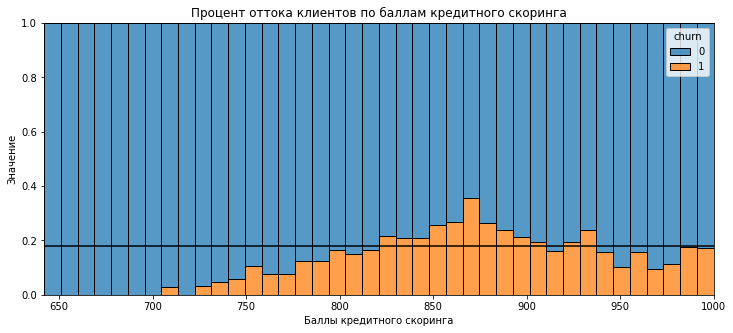

In [31]:
# построим гистограммы по каждому признаку, который может влиять на отток клиента
# гисторамма покажет процент количества ушедших клиентов по каждому значению признака  
# проведем линию, которая покажет 18% (общий процент оттока клиентов по банку)

plt.figure(figsize=(12,5))
sns.histplot(data=data, x='score', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black') 
plt.title('Процент оттока клиентов по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Значение')
plt.show()

***На гистограмме можно выделить сегмент по баллам кредитного скоринга от 820 до 940.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

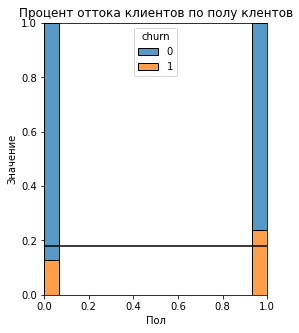

In [32]:
plt.figure(figsize=(4,5))
sns.histplot(data=data, x='gender', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black')
plt.title('Процент оттока клиентов по полу клентов')
plt.xlabel('Пол')
plt.ylabel('Значение')
plt.show()

***На гистограмме видим, что клиенты мужского пола чаще уходят из банка.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

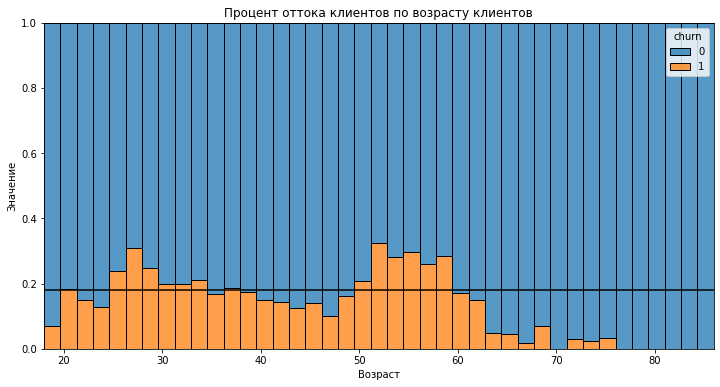

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='age', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black')
plt.title('Процент оттока клиентов по возрасту клиентов')
plt.xlabel('Возраст')
plt.ylabel('Значение')
plt.show()

***На гистограмме видим два сегмента по возрасту клиентов: 25-34 и 49-60.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

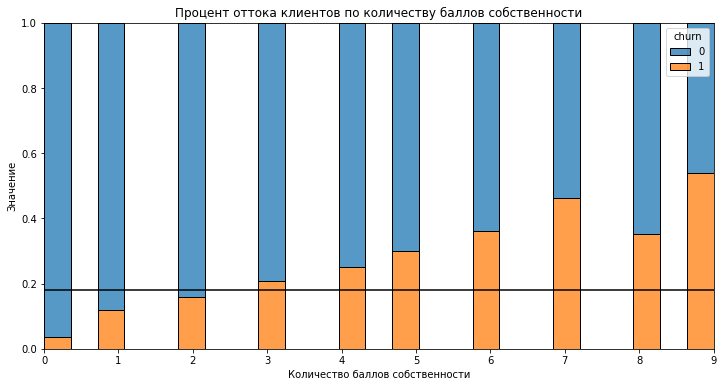

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='equity', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black')
plt.title('Процент оттока клиентов по количеству баллов собственности')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Значение')
plt.show()

***На гистограмме видим, что от 3 баллов собственности отток клиентов увеличивается. Сделаем три сегмента: 3-5, 6-7, 8-9***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

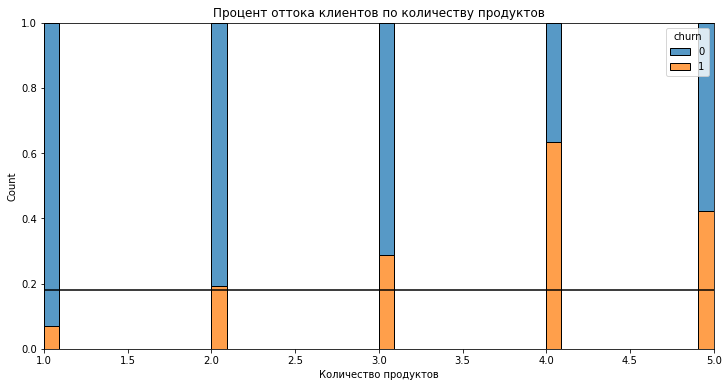

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='products', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black')
plt.title('Процент оттока клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.show()

***На гистограмме можно выделить три сегмента по количеству продуктов нашего банка: 2-3, 4 и 5.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

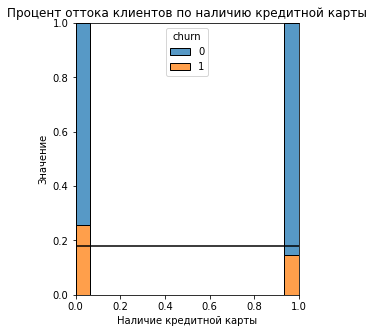

In [36]:
plt.figure(figsize=(4,5))
sns.histplot(data=data, x='credit_card', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black')
plt.title('Процент оттока клиентов по наличию кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Значение')
plt.show()

***На гистограмме видим, что отток клиентов больше у тех, кто не имеет кредитной карты в нашем банке.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

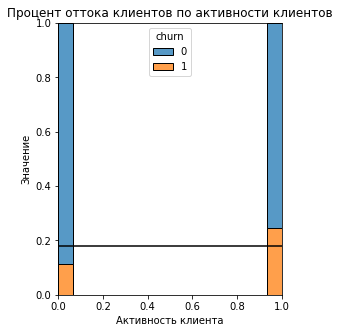

In [37]:
plt.figure(figsize=(4,5))
sns.histplot(data=data, x='last_activity', hue='churn', multiple="fill")
plt.axhline(y=0.18, color='black')
plt.title('Процент оттока клиентов по активности клиентов')
plt.xlabel('Активность клиента')
plt.ylabel('Значение')
plt.show()

***На гистограмме видим, что активные клиенты чаще уходят из банка.***

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Составление портретов  клиентов по нескольким сегментам

In [38]:
# составим портреты клиентов, которые чаще уходят из банка
# с помощью среза выделим их в новые таблицы.

portrait_1 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) & 
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) & 
    (data['credit_card'] == 0) & (data['last_activity'] == 1)
    )
]
portrait_1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
13,166357,837,Рыбинск,0,28,4,302249.22,2,0,1,30950.94,0
81,223978,850,Рыбинск,1,34,5,351583.16,4,0,1,115354.97,1
94,191870,821,Ростов,0,30,3,157677.78,4,0,1,36397.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9907,190839,925,Рыбинск,0,57,0,0.00,1,0,1,146407.76,0
9912,149773,900,Ростов,0,34,2,410240.77,2,0,1,171986.36,1
9972,150126,834,Ростов,1,27,4,192776.27,2,0,1,26570.39,0
9986,152986,822,Ярославль,1,58,5,1434857.91,2,0,1,83442.41,1


In [39]:
print('Количество клиентов в группе:', portrait_1['churn'].count())
print('Количество ушедших клиентов:', portrait_1['churn'].sum())
print('Процент оттока клиентов:', portrait_1['churn'].mean().round(3) * 100)

Количество клиентов в группе: 604
Количество ушедших клиентов: 355
Процент оттока клиентов: 58.8


**Портрет №1:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - любой,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **604**
*Количество ушедших клиентов:* **355**
*Процент оттока клиентов:* **58,8%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [40]:
portrait_2 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) &
    (data['city'] == "Ярославль") & (data['gender'] == 1) &
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) &
    (data['last_activity'] == 1)
    )      
]
portrait_2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
36,199614,822,Ярославль,1,60,5,1472483.77,1,1,1,89132.67,0
45,118849,826,Ярославль,1,31,4,333330.99,1,1,1,46981.53,0
68,216960,933,Ярославль,1,49,1,0.00,1,1,1,130281.88,0
77,191976,937,Ярославль,1,33,5,2061152.96,2,1,1,280670.62,1
88,210088,894,Ярославль,1,29,3,786911.18,2,1,1,99022.74,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,167524,856,Ярославль,1,50,3,265390.36,2,1,1,154039.56,1
9888,216904,900,Ярославль,1,31,0,0.00,1,0,1,125161.36,0
9978,218170,841,Ярославль,1,29,2,235287.10,2,1,1,137494.06,1
9986,152986,822,Ярославль,1,58,5,1434857.91,2,0,1,83442.41,1


In [41]:
print('Количество клиентов в группе:', portrait_2['churn'].count())
print('Количество ушедших клиентов:', portrait_2['churn'].sum())
print('Процент оттока клиентов:', portrait_2['churn'].mean().round(3) * 100)

Количество клиентов в группе: 459
Количество ушедших клиентов: 227
Процент оттока клиентов: 49.5


**Портрет №2:**

- Баллы кредитного скоринга от 820 до 940,
- город - Ярославль,
- пол - мужской,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **459**
*Количество ушедших клиентов:* **227**
*Процент оттока клиентов:* **49.5%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [42]:
portrait_3 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) &
    (data['city'] == "Ярославль") & (data['gender'] == 0) &
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) &
    (data['last_activity'] == 1)
    )      
]
portrait_3

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
12,132970,845,Ярославль,0,31,3,591928.52,2,1,1,112697.16,1
122,201526,894,Ярославль,0,32,4,1319552.08,2,0,1,140952.99,1
146,189685,850,Ярославль,0,59,4,832950.19,2,1,1,61821.42,1
151,119177,845,Ярославль,0,29,4,755670.79,3,0,1,112289.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9674,208874,869,Ярославль,0,59,3,321062.11,4,0,1,46527.66,0
9761,153252,828,Ярославль,0,51,4,464260.73,1,1,1,67909.68,0
9861,179288,908,Ярославль,0,55,5,2036988.28,4,1,1,122581.49,1
9899,140117,939,Ярославль,0,32,0,0.00,1,1,1,64241.52,0


In [43]:
print('Количество клиентов в группе:', portrait_3['churn'].count())
print('Количество ушедших клиентов:', portrait_3['churn'].sum())
print('Процент оттока клиентов:', portrait_3['churn'].mean().round(2) * 100)

Количество клиентов в группе: 406
Количество ушедших клиентов: 184
Процент оттока клиентов: 45.0


**Портрет №3:**

- Баллы кредитного скоринга от 820 до 940,
- город - Ярославль,
- пол - женский,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **408**
*Количество ушедших клиентов:* **184**
*Процент оттока клиентов:* **45%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [44]:
portrait_4 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) &
    (data['gender'] == 1) &
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) &
    (data['products'] > 1) & (data['last_activity'] == 1)
    )       
]
portrait_4

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
73,155403,859,Рыбинск,1,56,5,652553.80,2,1,1,60791.77,1
77,191976,937,Ярославль,1,33,5,2061152.96,2,1,1,280670.62,1
81,223978,850,Рыбинск,1,34,5,351583.16,4,0,1,115354.97,1
88,210088,894,Ярославль,1,29,3,786911.18,2,1,1,99022.74,1
103,128618,841,Ростов,1,29,1,175505.11,4,1,1,48188.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9835,227667,896,Ярославль,1,31,5,1639486.50,2,0,1,150627.46,1
9887,167524,856,Ярославль,1,50,3,265390.36,2,1,1,154039.56,1
9972,150126,834,Ростов,1,27,4,192776.27,2,0,1,26570.39,0
9978,218170,841,Ярославль,1,29,2,235287.10,2,1,1,137494.06,1


In [45]:
print('Количество клиентов в группе:', portrait_4['churn'].count())
print('Количество ушедших клиентов:', portrait_4['churn'].sum())
print('Процент оттока клиентов:', portrait_4['churn'].mean().round(3) * 100)

Количество клиентов в группе: 515
Количество ушедших клиентов: 331
Процент оттока клиентов: 64.3


**Портрет №4:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - мужской,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - больше 1,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **515**
*Количество ушедших клиентов:* **331**
*Процент оттока клиентов:* **64.3%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [46]:
portrait_5 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) &
    (data['gender'] == 0) &
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) &
    (data['products'] > 1) & (data['last_activity'] == 1)
    )       
]
portrait_5

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
12,132970,845,Ярославль,0,31,3,591928.52,2,1,1,112697.16,1
13,166357,837,Рыбинск,0,28,4,302249.22,2,0,1,30950.94,0
92,184891,826,Ростов,0,31,2,286655.30,2,1,1,75349.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9861,179288,908,Ярославль,0,55,5,2036988.28,4,1,1,122581.49,1
9912,149773,900,Ростов,0,34,2,410240.77,2,0,1,171986.36,1
9962,217489,893,Ярославль,0,49,5,1571192.11,4,1,1,151217.99,1
9975,212027,918,Рыбинск,0,34,1,226375.21,2,1,1,208353.35,0


In [47]:
print('Количество клиентов в группе:', portrait_5['churn'].count())
print('Количество ушедших клиентов:', portrait_5['churn'].sum())
print('Процент оттока клиентов:', portrait_5['churn'].mean().round(3) * 100)

Количество клиентов в группе: 529
Количество ушедших клиентов: 257
Процент оттока клиентов: 48.6


**Портрет №5:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - женский,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - больше 1,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **529**
*Количество ушедших клиентов:* **257**
*Процент оттока клиентов:* **48.6%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [48]:
portrait_6 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) &
    (data['city'] == "Ростов") &
    (data['last_activity'] == 1)
    )      
]
portrait_6

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
10,148929,927,Ростов,1,52,0,0.00,1,1,1,196820.07,0
11,172184,921,Ростов,1,41,0,0.00,1,1,1,217469.48,0
35,221927,863,Ростов,1,39,5,1461423.33,1,0,1,221699.52,0
92,184891,826,Ростов,0,31,2,286655.30,2,1,1,75349.94,0
94,191870,821,Ростов,0,30,3,157677.78,4,0,1,36397.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9903,203506,894,Ростов,0,68,0,0.00,1,1,1,174767.17,0
9912,149773,900,Ростов,0,34,2,410240.77,2,0,1,171986.36,1
9941,223285,862,Ростов,1,46,3,1784723.84,4,1,1,202524.28,1
9947,140864,830,Ростов,0,61,5,464724.86,2,1,1,124495.55,0


In [49]:
print('Количество клиентов в группе:', portrait_6['churn'].count())
print('Количество ушедших клиентов:', portrait_6['churn'].sum())
print('Процент оттока клиентов:', portrait_6['churn'].mean().round(3) * 100)

Количество клиентов в группе: 414
Количество ушедших клиентов: 133
Процент оттока клиентов: 32.1


**Портрет №6:**

- Баллы кредитного скоринга от 820 до 940,
- город - Ростов,
- пол - любой,
- возраст - любой,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **414**
*Количество ушедших клиентов:* **133**
*Процент оттока клиентов:* **32.1%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [50]:
portrait_7 = data[
 (
    (data['city'] == "Ростов") &
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) &
    (data['last_activity'] == 1)
    )      
]
portrait_7

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
10,148929,927,Ростов,1,52,0,0.00,1,1,1,196820.07,0
33,125478,786,Ростов,0,27,3,448062.52,3,1,1,37607.67,0
38,220711,794,Ростов,0,26,2,147487.39,2,0,1,24912.88,0
92,184891,826,Ростов,0,31,2,286655.30,2,1,1,75349.94,0
94,191870,821,Ростов,0,30,3,157677.78,4,0,1,36397.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9894,157510,775,Ростов,0,34,5,1483350.04,3,1,1,94062.42,0
9912,149773,900,Ростов,0,34,2,410240.77,2,0,1,171986.36,1
9950,140903,815,Ростов,0,32,2,357710.22,2,0,1,109905.85,0
9955,135762,813,Ростов,0,25,3,76080.91,1,1,1,22538.93,0


In [51]:
print('Количество клиентов в группе:', portrait_7['churn'].count())
print('Количество ушедших клиентов:', portrait_7['churn'].sum())
print('Процент оттока клиентов:', portrait_7['churn'].mean().round(1) * 100)

Количество клиентов в группе: 351
Количество ушедших клиентов: 98
Процент оттока клиентов: 30.0


**Портрет №7:**

- Баллы кредитного скоринга - не важно,
- город - Ростов,
- пол - любой,
- возраст от 25 до 34 или 49 до 60 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **351**
*Количество ушедших клиентов:* **98**
*Процент оттока клиентов:* **30%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [52]:
portrait_8 = data[
   (
    (data['gender'] == 0) &
    (data['products'] > 1) & (data['equity'] > 3) &
    (data['credit_card'] == 0) & (data['last_activity'] == 1)
    )         
]
portrait_8

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
13,166357,837,Рыбинск,0,28,4,302249.22,2,0,1,30950.94,0
61,136096,896,Ярославль,0,39,5,657597.09,2,0,1,266033.98,1
71,141119,792,Ростов,0,48,5,552231.35,2,0,1,116971.72,0
76,213688,922,Ярославль,0,37,5,1214707.38,4,0,1,85121.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9778,192405,777,Ростов,0,63,5,1470087.29,3,0,1,41727.85,0
9889,198329,823,Ростов,0,48,4,550575.09,4,0,1,86181.06,0
9893,164037,870,Ростов,0,64,5,940510.00,2,0,1,91551.07,0
9929,123664,819,Ярославль,0,36,4,331403.71,3,0,1,229367.86,0


In [53]:
print('Количество клиентов в группе:', portrait_8['churn'].count())
print('Количество ушедших клиентов:', portrait_8['churn'].sum())
print('Процент оттока клиентов:', portrait_8['churn'].mean().round(2) * 100)

Количество клиентов в группе: 489
Количество ушедших клиентов: 204
Процент оттока клиентов: 42.0


**Портрет №8:**

- Баллы кредитного скоринга - не важно,
- город - любой,
- пол - женский,
- возраст - не важно,
- количество баллов собственности больше 3,
- количество продуктов, которыми пользуется клиент больше 1,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **489**
*Количество ушедших клиентов:* **204**
*Процент оттока клиентов:* **42%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [54]:
portrait_9 = data[
    (
    (data['score'] >= 820) & (data['score'] <= 940) &
    ((data['age'] >= 25) & (data['age'] <= 34) | 
    (data['age'] >= 49) & (data['age'] <= 60)) &
    (data['equity'] >= 3) & (data['products'] > 1) &
    (data['last_activity'] == 1)
    )       
]
portrait_9

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
12,132970,845,Ярославль,0,31,3,591928.52,2,1,1,112697.16,1
13,166357,837,Рыбинск,0,28,4,302249.22,2,0,1,30950.94,0
73,155403,859,Рыбинск,1,56,5,652553.80,2,1,1,60791.77,1
77,191976,937,Ярославль,1,33,5,2061152.96,2,1,1,280670.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,167524,856,Ярославль,1,50,3,265390.36,2,1,1,154039.56,1
9962,217489,893,Ярославль,0,49,5,1571192.11,4,1,1,151217.99,1
9972,150126,834,Ростов,1,27,4,192776.27,2,0,1,26570.39,0
9986,152986,822,Ярославль,1,58,5,1434857.91,2,0,1,83442.41,1


In [55]:
print('Количество клиентов в группе:', portrait_9['churn'].count())
print('Количество ушедших клиентов:', portrait_9['churn'].sum())
print('Процент оттока клиентов:', portrait_9['churn'].mean().round(2) * 100)

Количество клиентов в группе: 846
Количество ушедших клиентов: 516
Процент оттока клиентов: 61.0


**Портрет №9:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - любой,
- возраст от 25 до 34 или 49 до 60 лет,
- количество баллов собственности больше 3,
- количество продуктов, которыми пользуется клиент больше 1,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **846**
*Количество ушедших клиентов:* **516**
*Процент оттока клиентов:* **61%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [56]:
portrait_10 = data[
  (
    (data['equity'] >= 3) & (data['products'] > 1) &
    (data['credit_card'] == 0) & (data['last_activity'] == 1)
  )         
]
portrait_10

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1
6,177259,807,Ярославль,0,39,3,405042.44,3,0,1,103838.32,0
13,166357,837,Рыбинск,0,28,4,302249.22,2,0,1,30950.94,0
26,174396,898,Ярославль,0,62,3,364049.27,3,0,1,50661.84,0
61,136096,896,Ярославль,0,39,5,657597.09,2,0,1,266033.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,117291,779,Ростов,0,44,4,380025.17,2,0,1,155887.84,0
9981,154871,892,Рыбинск,1,39,5,636287.72,2,0,1,227288.27,1
9986,152986,822,Ярославль,1,58,5,1434857.91,2,0,1,83442.41,1
9998,148700,777,Ярославль,0,68,3,865457.97,3,0,1,86874.90,0


In [57]:
print('Количество клиентов в группе:', portrait_10['churn'].count())
print('Количество ушедших клиентов:', portrait_10['churn'].sum())
print('Процент оттока клиентов:', portrait_10['churn'].mean().round(2) * 100)

Количество клиентов в группе: 1163
Количество ушедших клиентов: 535
Процент оттока клиентов: 46.0


**Портрет №10:**

- Баллы кредитного скоринга - любые,
- город - любой,
- пол - любой,
- возраст - любой,
- количество баллов собственности - больше 3,
- количество продуктов, которыми пользуется клиент - больше 1,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **1163**
*Количество ушедших клиентов:* **535**
*Процент оттока клиентов:* **46%**

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

***Составленные 10 групп клиентов находятся в зоне риска оттока, так как процент оттока в каждой группе выше общего процента оттока по банку.***

#### Выделение трех групп клиентов из выделенных сегментов, которые чаще всего уходят

*На данном этапе выделим три группы с самым большим процентом оттока из собранных.*

*Самый большой отток клиентов в группе `Портрет №4` - 64,3%*

**Портрет №4:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - мужской,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - больше 1,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Следующая группа `Портрет №9` с процентом оттока клиентов - 61%*

**Портрет №9:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - любой,
- возраст от 25 до 34 или 49 до 60 лет,
- количество баллов собственности больше 3,
- количество продуктов, которыми пользуется клиент больше 1,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Группа `Портрет №1` тоже имеет высокий процент оттока клиентов - 58,8%*

**Портрет №1:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - любой,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

***На данном шаге мы увидели с помощью гистограмм какой процент оттока клиентов по отношению к оставшимся. Выделили сегменты клиентов, которые склонны к уходу из банка, сформировали 10 портретов клиентов, на которых стоит обратить внимание! Из этих 10 групп выделили 3 группы: `Портрет №1`, `Портрет №4`, `Портрет №9` которые больше всего в группе риска ухода из банка.***

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Процент оттока я не увидела ни в одном сегменты. Нужно для каждого сегмента его рассчитать</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Немного изменил 4.2 и 4.3, добавил данные по количеству и проценту оттока. Изменил вывод и поменял слайды в презентации.</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично получилось, молодец!
</div>

### Проверка гипотез

#### Формулирование и проверка гипотезы №1

***Проверить гипотезу есть ли различия дохода между теми клиентами, которые ушли и теми, которые остались***

*Нулевая гипотеза: Средние доходы оставшихся и ушедших клиентов равны. Альтернативная гипотеза: Средние доходы оставшихся и ушедших клиентов разные. Уровень статистической значимости выберем 0,05.*

In [58]:
# для проверки гипотезы проведем t-test:

# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


***Полученное значение p-value больше заданного уровня значимости, поэтому нулевую гипотезу мы не отвергаем. Средние доходы оставшихся и ушедших клиентов равны.***

#### Формулирование и проверка гипотезы №2

***Проверить гипотезу есть ли различия в среднем возрасте между теми клиентами, которые ушли и теми, которые остались***

*Нулевая гипотеза: Средний возвраст оставшихся и ушедших клиентов равен. Альтернативная гипотеза: Средний возвраст оставшихся и ушедших клиентов разный. Уровень статистической значимости выберем 0,05.*

In [59]:
# для проверки гипотезы проведем t-test:

# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['age'],
    data[data['churn']==1]['age'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

7.536127357312234e-08
Отвергаем нулевую гипотезу


***Полученное значение p-value меньше заданного уровня значимости, поэтому нулевую гипотезу отвергаем. Средний возвраст оставшихся и ушедших клиентов разный.***

#### Формулирование и проверка гипотезы №3

***Проверить гипотезу среднее количество банковских продуктов разное у оставшихся и ушедших клиентов.***

*Нулевая гипотеза: Среднее количество используемых банковских продуктов оставшихся и ушедших клиентов равны. Альтернативная гипотеза: Среднее количество используемых банковских продуктов оставшихся и ушедших клиентов  разное. Уровень статистической значимости выберем 0,05.*

In [60]:
# для проверки гипотезы проведем t-test:

# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.2671065900765871e-138
Отвергаем нулевую гипотезу


***Полученное значение p-value меньше заданного уровня значимости, поэтому нулевую гипотезу отвергаем. Среднее количество используемых банковских продуктов оставшихся и ушедших клиентов разное.***

***На данном шаге было сформулировано три гипотезы две из которых были отвергнуты, а одну мы не смогли отвергнуть.***

- *Средние доходы оставшихся и ушедших клиентов равны*
- *Средний возвраст оставшихся и ушедших клиентов разный*
- *Среднее количество используемых банковских продуктов оставшихся и ушедших клиентов разное*

<div class="alert alert-success">
<b>👍 Успех:</b> Гипотезы сформулированы и проверены!
</div>

### Общий вывод и рекомендации

***Анализ показал, что из почти 10000 клиентов общий отток у банка 18,2%. По городам он распределен следующим образом: Ярославль - 19%, Ростов - 18.7% и Рыбинск - 16.3%. Сформирован средний портрет клиента: Клиент мужчина или женщина от 39 до 43 лет со средней активностью, средний доход от 100 до 160 тыс руб., с открытой кредитной картой, пользуется в среднем двумя продуктами банкаи имеет около 850 баллов кредитного скоринга. Так же анализ показал, что нет зависимости между наличием кредитной карты, полом и активностью клиентов, которые ушли или остались.***

***При планировании дальнейшей работы с клиентами отделу маркетинга можно опираться на сформированные 10 портретов клиентов, которые больше всего подвержены оттоку, а так же для начала проработать всех клиентов попадающих под данные описания:*** 

**`Портрет №4`:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - мужской,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - больше 1,
- есть ли кредитная карта - не важно,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **515**
*Количество ушедших клиентов:* **331**
*Процент оттока клиентов:* **64.3%**

**`Портрет №9`:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - любой,
- возраст от 25 до 34 или 49 до 60 лет,
- количество баллов собственности больше 3,
- количество продуктов, которыми пользуется клиент больше 1,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **846**
*Количество ушедших клиентов:* **516**
*Процент оттока клиентов:* **61%**

**`Портрет №1`:**

- Баллы кредитного скоринга от 820 до 940,
- город - любой,
- пол - любой,
- возраст от 20 до 23 или 25 до 34 лет,
- количество баллов собственности - любое,
- количество продуктов, которыми пользуется клиент - любое,
- есть ли кредитная карта - нет,
- активный клиент - да,
- оценочный доход клиента - любой.

*Количество клиентов в группе:* **604**
*Количество ушедших клиентов:* **355**
*Процент оттока клиентов:* **58,8%**


***Данным клиентам можно предложить:***

- оформить кредитную карту;
- дополнительные продукты банка со скидкой;
- льготные условия для перевода заработной платы в наш банк;
- специальные условия на оформление страхования собственности;
- повышенный кэшбек для определенных групп товаров

**ПРОИНФОРМИРОВАТЬ ВСЕХ КЛИЕНТОВ О НОВЫХ ПРОДУКТАХ БАНКА УДОБНЫМИ ДЛЯ НИХ СПОСОБАМИ.**


### Презентация

https://disk.yandex.ru/i/aj30t_Kb4v_4RA

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Все данные исследованы, много визуализации, сделаны выводы по всем разделам, достаточное количество рассуждений и комментариев, в презентации соблюден баланс текстовой и графической информации
</div>